# Numerically solving the Schrodinger Equation

This python notebook will show a simple method to find solutions to the Schrodinger equation using what is called the shooting method. Recall that the Schrodinger equation can be written as:

$$ -\frac{\hbar^2}{2 m} \frac{\partial^2 \psi}{\partial x^2} +(V(x)- E) \psi =0 $$

where $V(x)$ is the potential and both the energy $E$ and the wavefunction $\psi$ are unknown.
The fact that we do not know the eigenvalue $E$ means that we have to use trial and error to guess a value for $E$ and the numerically solve Schrodinger's equation to find $\psi(x)$. We will know if our solution is correct if the wavefunction approaches 0 for large $x$.

To proceed we first change our units so that $\hbar= m=1$ and then add in a new variable $\phi$ which represents the derivative of $\psi$ to give us the set of first order differential equations:

$$ \begin{align}
    \frac{d \psi}{d x} &= \phi(x) \\
    \frac{d \phi}{d x} &= 2(V(x)-E) \psi(x)
    \end{align} $$

Recall that we did the same trick in the Cyclotron Motion notebook to convert the 2nd order differential equations into a set of first order differential equations. This means that we can use the inbuilt functions such as 'odeint' to automatically solve the equations for us.

So first as usual we import the required libraries

In [1]:
from modules import schrodinger as srod

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import odeint

%load_ext autoreload
%autoreload 2
%matplotlib inline

Next we define the range over which we want to find the solutions. For the example below this is taken to be between $-20< x <20$ and we split it up into 2000 points.

In [2]:
start_position=-20.0
end_position=20   #set this to be the correct end point.
space_steps=2000
step=(end_position-start_position)/(space_steps-1)
space=np.linspace(start_position,end_position,space_steps)

Next we define our potential function. This can be an arbitrary function but here I have taken it to be a square well with a negative depth and lying symmetrically about $x=0$.

In [3]:
def potential(x,depth,width):  #square well potential
    pot=0.0
    if abs(x)<=width/2:
        pot=depth
    else:
        pot=0.0
    return pot

Lets plot the potential so that we know what it looks like.

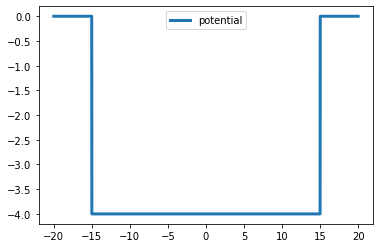

In [4]:
potfun=np.zeros(space_steps)
for ii in range(0,space_steps):
    potfun[ii]=potential(space[ii],-4,30)

plt.figure()
plt.plot(space,potfun,linewidth=3,label='potential')
plt.legend()
plt.show()

Now we define the derivatives functions for the equations above. These are the equations that we want to solve.

In [5]:
def shoot(yin,position,depth,width,energy):
    return np.array([yin[1],
                     2.0 * (potential(position,depth,width)-energy) * yin[0]])

Now we still don't know the initial values for $\psi(-20)$ and $\phi(-20)$ since we don't know the energy eigenvalue. However the Schrodinger equation is linear which means that we are free to set $\psi(-20)=1$ since if $\psi(x)$ is a solution so is $\alpha \psi(x)$ for any complex number $\alpha$. We also know that $\psi(x)$ decays exponentially if the energy is less than the potential and that the rate of decay is given by $V(x)-E$. Thus we can approximate the derivative of $psi(x)$ (i.e. $\phi(x)$) as $\phi(x) \approx (V(x)-E) \psi(x)$.

We then guess an energy level $E_g$ which means that the initially
$\phi(-20)=(V(-20)-E_g)$. Since for the square well potential $V(-20)=0$ this just becomes $\phi(-20)=-E_g$.

The Shooting method thus involves guessing an initial value of the energy and integrating the equations to see if it that value is correct. To see this in action let us use a potential well with a depth of -5 and a width of 30. This ensures that there are plenty of solutions to the Schrodinger equation. Our first guess will be that E=-4.9896. 

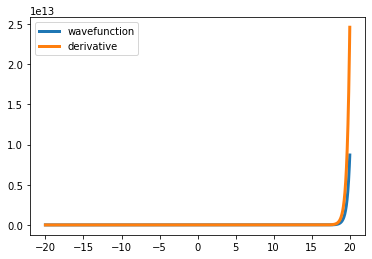

In [6]:
energy_guess=-3.999  #this is our initial guess.
start=np.array([1.0,-np.sqrt(-energy_guess)])

xout=odeint(shoot,start,space,args=(-4.0,30,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]

srod.plot_potential(psi,psiprime)

Notice that the solution is clearly wrong since it heads towards $\infty$ for large $x$. So
we can amend our guess of the energy for something larger and try again.

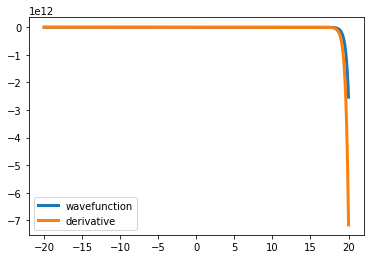

In [7]:
energy_guess=-3.99 #this is our second guess.
start=np.array([1.0,-np.sqrt(-energy_guess)])

xout=odeint(shoot,start,space,args=(-4.0,30,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]

srod.plot_potential(psi,psiprime)

Now the solution is still wrong but it heads towards $-\infty$ for large $x$. We can thus say that the correct value for the energy must lie between our two solutions and all we have to do is find it. Trial and error leads to the solution below.

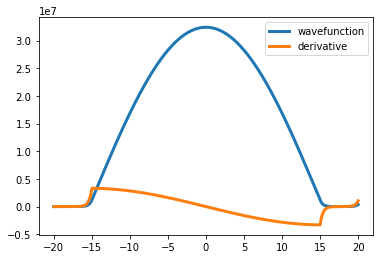

In [8]:
energy_guess=-3.9947665559297138316  #this is ground state
start=np.array([1.0,np.sqrt(-energy_guess)])

xout=odeint(shoot,start,space,args=(-4.0,30,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]

srod.plot_potential(psi,psiprime)

Note that as expected the ground state wavefunction has a single maximum and goes to zero as the distance from the well increases. It is clear however that the wavefunction is not normalised i.e. the integral of $|\psi(x)|^2 \neq 1$. However since this is just a number we can easily calculate the integral of the solution above and divide through by that to normalise everything.




In [9]:
def normalise(y,step):  #a quick and dirty integrator that is good enough.
    out=0.0
    for ii in range(0,len(y)):
        out=out+y[ii]*y[ii]
    return np.sqrt(out*step)

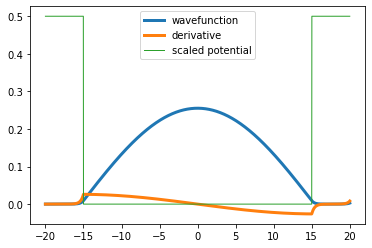

In [10]:
result=normalise(psi,step)

psi=psi/result
psiprime=psiprime/result

srod.plot_potential_with_scaled(psi,psiprime, potfun)

A bit more trial and error leads to the next guess for the energy of the first higher order state.

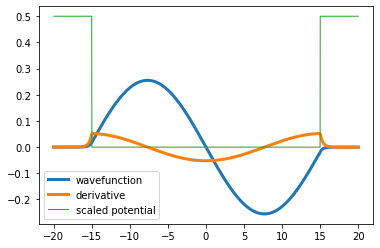

In [11]:
energy_guess=-3.9790668560912517  #this is first higher order state
start=np.array([1.0,np.sqrt(-energy_guess)])

xout=odeint(shoot,start,space,args=(-4.0,30,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]
result=normalise(psi,step)

psi=psi/result
psiprime=psiprime/result

srod.plot_potential_with_scaled(psi,psiprime, potfun)

It very quickly gets complicated to continually bisect the interval to find new
solutions. However it is fairly easy to write a program that does that for us. There are lots of different ways of doing so since it is the same as finding the zero of a function but this is perhaps the simplest. We start with two values $E_1$ and $E_2$ which have the property that
the solution to the equation goes to $\pm \infty$ for the two values and then we look at the
sign of the solution at the midpoint.

If the sign of the solution at the midpoint is the same value as $E_1$ we replace $E_1$ by
$(E_1+E_2)/2$ and start again. Otherwise we replace $E_2$ by the midpoint and start again. 
Each time we do this the size of the interval decreases by a factor of 2 so we can continue doing it for as long as we like. In practice we stop when we run out of numerical precision.


In [12]:
def find(start,stop): #make sure that the solution goes in different directions for the two values of start and stop
    
    guess_history = []
    
    out1=odeint(shoot,np.array([1.0,np.sqrt(-start)]),space,args=(-4.0,30,start))[-1][0]
    #out1 is the final value of our trial solution for the guess Energy=start
    # the element [-1][0] picks the last element in the array.
    out2=odeint(shoot,np.array([1.0,np.sqrt(-stop)]),space,args=(-4.0,30,stop))[-1][0]
    #out2 is the final value of our trial solution for the guess Energy=stop.
    guess=(stop+start)/2.0
    #guess is the midpoint of the interval.
    out3=odeint(shoot,np.array([1.0,np.sqrt(-guess)]),space,args=(-4.0,30,guess))[-1][0]
    #out3 is the final value of the trial solution for the guess Energy=guess.
    print(out1,out2,out3) #prints out the three values. Check that two of them have different signs.
    count=1
    while count<50:
        guess_history += [guess]
        if np.sign(out1)==np.sign(out3):
            start=guess
        else:
            stop=guess
        out1=odeint(shoot,np.array([1.0,np.sqrt(-start)]),space,args=(-4.0,30,start))[-1][0]
        out2=odeint(shoot,np.array([1.0,np.sqrt(-stop)]),space,args=(-4.0,30,stop))[-1][0]
        guess=(stop+start)/2.0
        out3=odeint(shoot,np.array([1.0,np.sqrt(-guess)]),space,args=(-4.0,30,guess))[-1][0]
        print(out1,out2,out3)
        count=count+1
    return guess

Let us see it in action

In [13]:
find(-3.95,-3.979)

-1744967115100.331 105633103236.28992 7299012122453.463
-1744967115100.331 7299012122453.463 2953906107718.908
-1744967115100.331 2953906107718.908 471129471800.4718
-1744967115100.331 471129471800.4718 -686147163856.966
-686147163856.966 471129471800.4718 -118073263335.51231
-118073263335.51231 471129471800.4718 174115288226.37595
-118073263335.51231 174115288226.37595 27387130021.854332
-118073263335.51231 27387130021.854332 -45505278032.6977
-45505278032.6977 27387130021.854332 -9099303872.946432
-9099303872.946432 27387130021.854332 9133888377.903614
-9099303872.946432 9133888377.903614 14751060.585932188
-9099303872.946432 14751060.585932188 -4543019956.187528
-4543019956.187528 14751060.585932188 -2264180250.678487
-2264180250.678487 14751060.585932188 -1124793795.0866566
-1124793795.0866566 14751060.585932188 -554889235.1811783
-554889235.1811783 14751060.585932188 -270009748.22298783
-270009748.22298783 14751060.585932188 -127638851.10172665
-127638851.10172665 14751060.5859321

-3.952902809182185

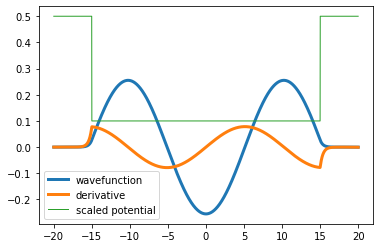

In [14]:
energy_guess=-3.952902809182185  #this is 2nd higher order state
start=np.array([1.0,np.sqrt(-energy_guess)])

xout=odeint(shoot,start,space,args=(-4.0,30,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]
result=normalise(psi,step)

psi=psi/result
psiprime=psiprime/result
plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.plot(space,potfun/10+0.5,linewidth=1,label='scaled potential') #show the potential well as well
plt.legend()
plt.show()

In [15]:
find(-2.80,-2.90)

-8627289965.66353 27482640756.477707 10463861765.782553
-8627289965.66353 10463861765.782553 -213681577.96120825
-213681577.96120825 10463861765.782553 4981086165.034752
-213681577.96120825 4981086165.034752 2327475397.2042403
-213681577.96120825 2327475397.2042403 1040547938.8302509
-213681577.96120825 1040547938.8302509 409075044.32530147
-213681577.96120825 409075044.32530147 96575249.16202654
-213681577.96120825 96575249.16202654 -58838116.33315771
-58838116.33315771 96575249.16202654 18797545.961560823
-58838116.33315771 18797545.961560823 -20038995.876386076
-20038995.876386076 18797545.961560823 -624096.3457697224
-624096.3457697224 18797545.961560823 9084212.61168502
-624096.3457697224 9084212.61168502 4230317.0502651045
-624096.3457697224 4230317.0502651045 1802735.9462804704
-624096.3457697224 1802735.9462804704 589213.1716891435
-624096.3457697224 589213.1716891435 -18639.7616914235
-18639.7616914235 589213.1716891435 285735.45892731746
-18639.7616914235 285735.45892731746 1

-2.8255386792123183

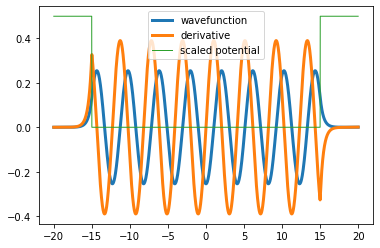

In [16]:
energy_guess=-2.825538679175513  #which state is this?
start=np.array([1.0,np.sqrt(-energy_guess)])

xout=odeint(shoot,start,space,args=(-4.0,30,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]
result=normalise(psi,step)

psi=psi/result
psiprime=psiprime/result
plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.plot(space,potfun/8+0.5,linewidth=1,label='scaled potential') #show the potential well as well
plt.legend()
plt.show()


## Simple Harmonic Potential

In class we have also looked at a harmonic potential well defined by

$$ V(x) =\frac{x^2}{w^2} $$

where $w$ defines the steepness of the well. We can easily adapt our code to find the wavefunctions for this case as well.  

In [17]:
def potential(x,width):  #harmonic potential well
    return x**2/(width**2)
for ii in range(0,space_steps):
    potfun[ii]=potential(space[ii],10)
    
def shoot(yin,position,width,energy):
    return np.array([yin[1],2.0*(potential(position,width)-energy)*yin[0]])

In [18]:
def find_harmonic(start,stop,width): #make sure that the solution goes in different directions for the two values of start and stop
    out1=odeint(shoot,np.array([1.0,np.sqrt(potential(-20,width)-start)]),space,args=(width,start))[-1][0]
    #out1 is the final value of our trial solution for the guess Energy=start
    # the element [-1][0] picks the last element in the array.
    out2=odeint(shoot,np.array([1.0,np.sqrt(potential(-20,width)-stop)]),space,args=(width,stop))[-1][0]
    #out2 is the final value of our trial solution for the guess Energy=stop.
    guess=(stop+start)/2.0
    #guess is the midpoint of the interval.
    out3=odeint(shoot,np.array([1.0,np.sqrt(potential(-20,width)-guess)]),space,args=(width,guess))[-1][0]
    #out3 is the final value of the trial solution for the guess Energy=guess.
    print(out1,out2,out3) #prints out the three values. Check that two of them have different signs.
    count=1
    while count<50:
        if np.sign(out1)==np.sign(out3):
            start=guess
        else:
            stop=guess
        out1=odeint(shoot,np.array([1.0,np.sqrt(potential(-20,width)-start)]),space,args=(width,start))[-1][0]
        out2=odeint(shoot,np.array([1.0,np.sqrt(potential(-20,width)-stop)]),space,args=(width,stop))[-1][0]
        guess=(stop+start)/2.0
        out3=odeint(shoot,np.array([1.0,np.sqrt(potential(-20,width)-guess)]),space,args=(width,guess))[-1][0]
        print(out1,out2,out3)
        count=count+1
    return guess

In [19]:
find_harmonic(0,0.2,10)

4.4647633375241574e+24 -8.230494884619299e+20 -4.958735363161224e+22
4.4647633375241574e+24 -4.958735363161224e+22 2.3336693968977845e+23
2.3336693968977845e+23 -4.958735363161224e+22 -1.9245551958053058e+22
2.3336693968977845e+23 -1.9245551958053058e+22 5.872442806757342e+22
5.872442806757342e+22 -1.9245551958053058e+22 1.1124324934537615e+22
1.1124324934537615e+22 -1.9245551958053058e+22 -5.876946987076946e+21
1.1124324934537615e+22 -5.876946987076946e+21 2.131047267516047e+21
2.131047267516047e+21 -5.876946987076946e+21 -1.9910850893427012e+21
2.131047267516047e+21 -1.9910850893427012e+21 3.983465520778598e+19
3.983465520778598e+19 -1.9910850893427012e+21 -9.830837350124732e+20
3.983465520778598e+19 -9.830837350124732e+20 -4.734994592960302e+20
3.983465520778598e+19 -4.734994592960302e+20 -2.173021125153584e+20
3.983465520778598e+19 -2.173021125153584e+20 -8.885133608307009e+19
3.983465520778598e+19 -8.885133608307009e+19 -2.453778462316834e+19
3.983465520778598e+19 -2.4537784623168

0.07071067758588272

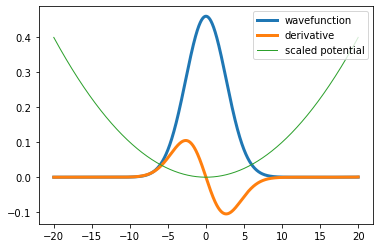

In [20]:
energy_guess=0.07071067758588272  #this is a higher order state
start=np.array([1.0,np.sqrt(potential(-20,10)-energy_guess)])

xout=odeint(shoot,start,space,args=(10,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]
psiprime=xt[1]
result=normalise(psi,step) 

psi=psi/result #again we normalise the solution.
psiprime=psiprime/result
plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.plot(space,potfun/10,linewidth=1,label='scaled potential') #show the potential well as well
plt.legend()
plt.show()

It can be seen that this looks like the ground state solution to Schrodinger's equation. It is symmetric about $x=0$ and has a single maximum. Note that as before we normalise the solution.

If our method works then we should be able to find the next solution which will be anti-symmetric with $\psi(0)=0$ and have two extrema. So lets try a new guess.

In [21]:
find_harmonic(0.1,0.5,10)

-4.958735363161224e+22 1.0836557310390027e+17 1.5576339198468243e+20
-4.958735363161224e+22 1.5576339198468243e+20 -8.230494884619299e+20
-8.230494884619299e+20 1.5576339198468243e+20 5.1797588592442186e+20
-8.230494884619299e+20 5.1797588592442186e+20 4.092131798728768e+20
-8.230494884619299e+20 4.092131798728768e+20 1.7268095270496283e+19
-8.230494884619299e+20 1.7268095270496283e+19 -3.327397400431058e+20
-3.327397400431058e+20 1.7268095270496283e+19 -1.4214361470610422e+20
-1.4214361470610422e+20 1.7268095270496283e+19 -5.876646833814664e+19
-5.876646833814664e+19 1.7268095270496283e+19 -1.985868977527729e+19
-1.985868977527729e+19 1.7268095270496283e+19 -1.0760627744017372e+18
-1.0760627744017372e+18 1.7268095270496283e+19 8.150413406777244e+18
-1.0760627744017372e+18 8.150413406777244e+18 3.5508365454413916e+18
-1.0760627744017372e+18 3.5508365454413916e+18 1.2407789878865413e+18
-1.0760627744017372e+18 1.2407789878865413e+18 8.326729683998517e+16
-1.0760627744017372e+18 8.326729

0.21213203429823696

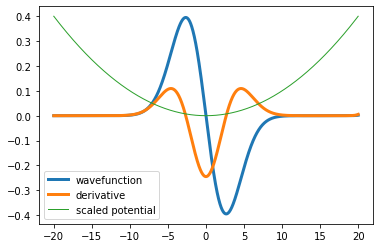

In [22]:
energy_guess=0.21213203429823696  #this is the second eigenvalue
start=np.array([1.0,np.sqrt(potential(-20,10)-energy_guess)])

xout=odeint(shoot,start,space,args=(10,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]
result=normalise(psi,step) 

psi=psi/result #again we normalise the solution.
psiprime=psiprime/result
plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.plot(space,potfun/10,linewidth=1,label='scaled potential') #show the potential well as well
plt.legend()
plt.show()

Again our code has found the solution that we expect. We can see that it is quite a bit wider than the fundamental solution. We have scaled the potential by a factor of 4 so that it fits nicely on the graph. We can carry on and find the next solution.

In [23]:
find_harmonic(0.25,0.6,10)

5.1797588592442186e+20 6.839567006498784e+16 -6.159170714149724e+18
5.1797588592442186e+20 -6.159170714149724e+18 2.100879103890845e+19
2.100879103890845e+19 -6.159170714149724e+18 -1.0908943307083964e+19
2.100879103890845e+19 -1.0908943307083964e+19 -4.3282029002060083e+18
2.100879103890845e+19 -4.3282029002060083e+18 5.090003609531224e+18
5.090003609531224e+18 -4.3282029002060083e+18 -3.0413513178442515e+17
5.090003609531224e+18 -3.0413513178442515e+17 2.2065719982031242e+18
2.2065719982031242e+18 -3.0413513178442515e+17 9.065711109416417e+17
9.065711109416417e+17 -3.0413513178442515e+17 2.902939394369856e+17
2.902939394369856e+17 -3.0413513178442515e+17 -9622453826884080.0
2.902939394369856e+17 -9622453826884080.0 1.3965577041603147e+17
1.3965577041603147e+17 -9622453826884080.0 6.4848434612233944e+16
6.4848434612233944e+16 -9622453826884080.0 2.7570370546088732e+16
2.7570370546088732e+16 -9622453826884080.0 8963789387736515.0
8963789387736515.0 -9622453826884080.0 -332243137151539.

0.35355339015204545

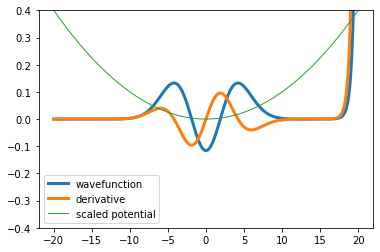

In [24]:
energy_guess=0.35355339015204545  #this is a higher order state
start=np.array([1.0,np.sqrt(potential(-20,10)-energy_guess)])

xout=odeint(shoot,start,space,args=(10,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]
result=normalise(psi,step) 

psi=psi/result #again we normalise the solution.
psiprime=psiprime/result
plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.plot(space,potfun/10,linewidth=1,label='scaled potential') #show the potential well as well
plt.legend()
plt.ylim(-0.4,0.4)
plt.show()

We know for the harmonic potential the eigenvalues are evenly spaced. In our case the spacing is about $\sqrt{2}/10$ so we expect the next solution to be at 0.49497474683058326708.

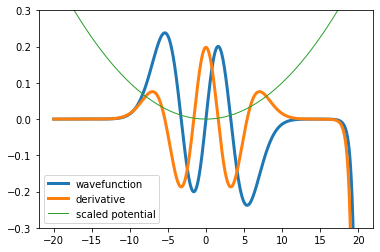

In [25]:
energy_guess=0.49497474683058326708  #no need to use find now since we know the energy spacing.
start=np.array([1.0,np.sqrt(potential(-20,10)-energy_guess)])

xout=odeint(shoot,start,space,args=(10,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]
result=normalise(psi,step) 

psi=psi/result #again we normalise the solution.
psiprime=psiprime/result
plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.plot(space,potfun/10,linewidth=1,label='scaled potential') #show the potential well as well
plt.legend()
plt.ylim(-0.3,0.3)
plt.show()